In [1]:
setwd("D:/Dropbox/Data Science and Analytics/ESSEC-Strategic Business Analytics/Marketing Analytics")

In [10]:
data=read.delim(file="purchases.txt",header=FALSE, sep='\t',dec='.')
head(data)

V1,V2,V3
760,25,2009-11-06
860,50,2012-09-28
1200,100,2005-10-25
1420,50,2009-07-09
1940,70,2013-01-25
1960,40,2013-10-29


In [11]:
summary(data)

       V1               V2                   V3       
 Min.   :    10   Min.   :   5.00   2013-12-31:  864  
 1st Qu.: 57720   1st Qu.:  25.00   2006-12-31:  584  
 Median :102440   Median :  30.00   2012-12-31:  583  
 Mean   :108935   Mean   :  62.34   2011-12-31:  510  
 3rd Qu.:160525   3rd Qu.:  60.00   2008-12-31:  503  
 Max.   :264200   Max.   :4500.00   2014-12-31:  485  
                                    (Other)   :47714  

In [12]:
colnames(data)=c('customer_id','purchase_amount','date_of_purchase')
data$date_of_purchase=as.Date(data$date_of_purchase,'%Y-%m-%d')
data$year_of_purchase=as.numeric(format(data$date_of_purchase,'%Y'))
#display dataset after transformation
head(data)

customer_id,purchase_amount,date_of_purchase,year_of_purchase
760,25,2009-11-06,2009
860,50,2012-09-28,2012
1200,100,2005-10-25,2005
1420,50,2009-07-09,2009
1940,70,2013-01-25,2013
1960,40,2013-10-29,2013


In [13]:
summary(data)

  customer_id     purchase_amount   date_of_purchase     year_of_purchase
 Min.   :    10   Min.   :   5.00   Min.   :2005-01-02   Min.   :2005    
 1st Qu.: 57720   1st Qu.:  25.00   1st Qu.:2009-01-17   1st Qu.:2009    
 Median :102440   Median :  30.00   Median :2011-11-23   Median :2011    
 Mean   :108935   Mean   :  62.34   Mean   :2011-07-14   Mean   :2011    
 3rd Qu.:160525   3rd Qu.:  60.00   3rd Qu.:2013-12-29   3rd Qu.:2013    
 Max.   :264200   Max.   :4500.00   Max.   :2015-12-31   Max.   :2015    

In [16]:
#explore data using sql statements
library(sqldf)
x=sqldf("select year_of_purchase, count(year_of_purchase) as counter from data
       group by 1 
       order by 1")

Warning message:
"package 'sqldf' was built under R version 3.4.2"Loading required package: gsubfn
Warning message:
"package 'gsubfn' was built under R version 3.4.2"Loading required package: proto
Warning message:
"package 'proto' was built under R version 3.4.2"Could not load tcltk.  Will use slower R code instead.
Loading required package: RSQLite


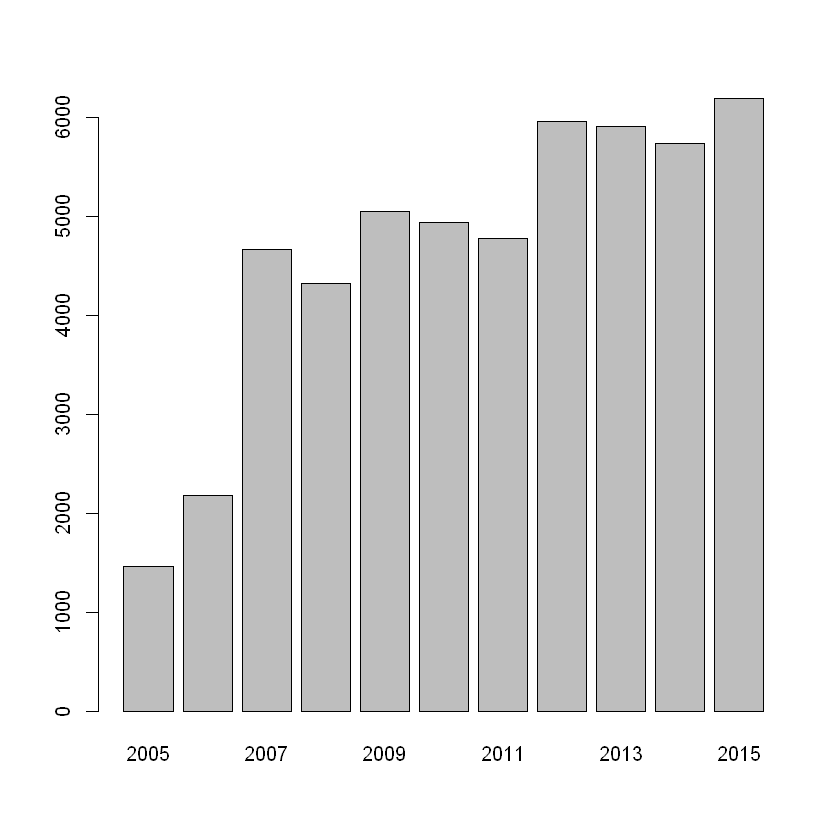

In [17]:
barplot(x$counter,names.arg=x$year_of_purchase)

In [18]:
x=sqldf("select year_of_purchase, avg(purchase_amount) as avg_amount
from data
group by 1
order by 1")

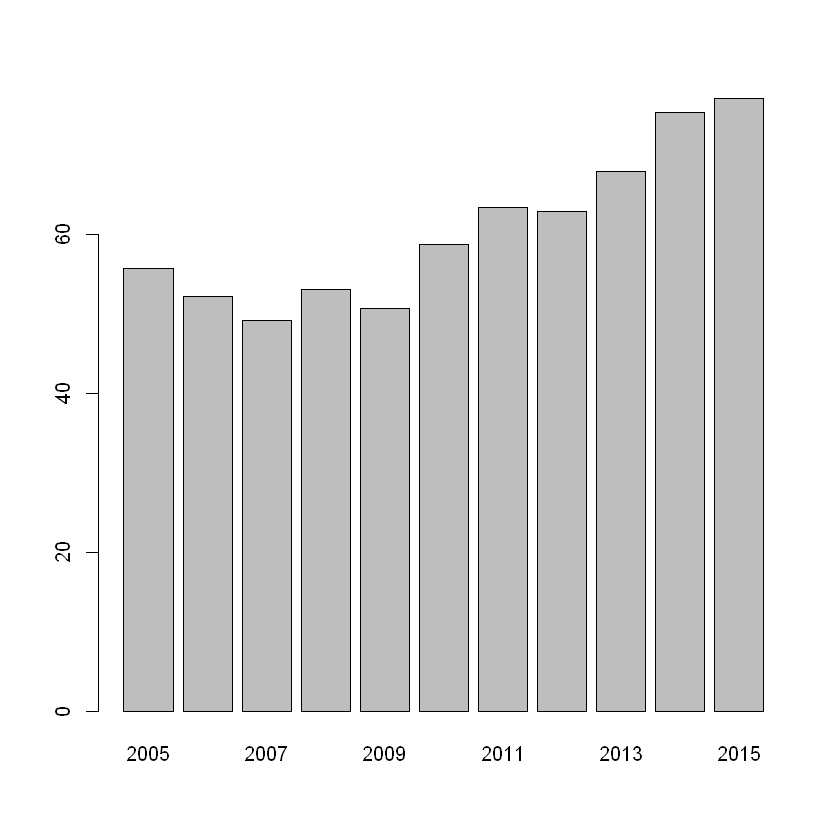

In [19]:
barplot(x$avg_amount,names.arg=x$year_of_purchase)

In [21]:
x=sqldf("select year_of_purchase, count(year_of_purchase) as counter, avg(purchase_amount) as avg_amount, 
sum(purchase_amount) as total_amount from data
group by 1
order by 1")


In [23]:
print(x)

   year_of_purchase counter avg_amount total_amount
1              2005    1470   55.82612      82064.4
2              2006    2182   52.25045     114010.5
3              2007    4674   49.26401     230260.0
4              2008    4331   53.07178     229853.9
5              2009    5054   50.74525     256466.5
6              2010    4939   58.74001     290116.9
7              2011    4785   63.51930     303939.8
8              2012    5960   62.91331     374963.3
9              2013    5912   67.93136     401610.2
10             2014    5739   75.39035     432665.2
11             2015    6197   77.19770     478394.1
